In [1]:
from confirm.outlaw.nb_util import setup_nb

setup_nb()

import matplotlib.pyplot as plt
import scipy.stats
import jax
import jax.numpy as jnp
import numpy as np

import confirm.imprint as ip
from confirm.models.binom1d import Binom1D

## Binomial

0.19999999999999996


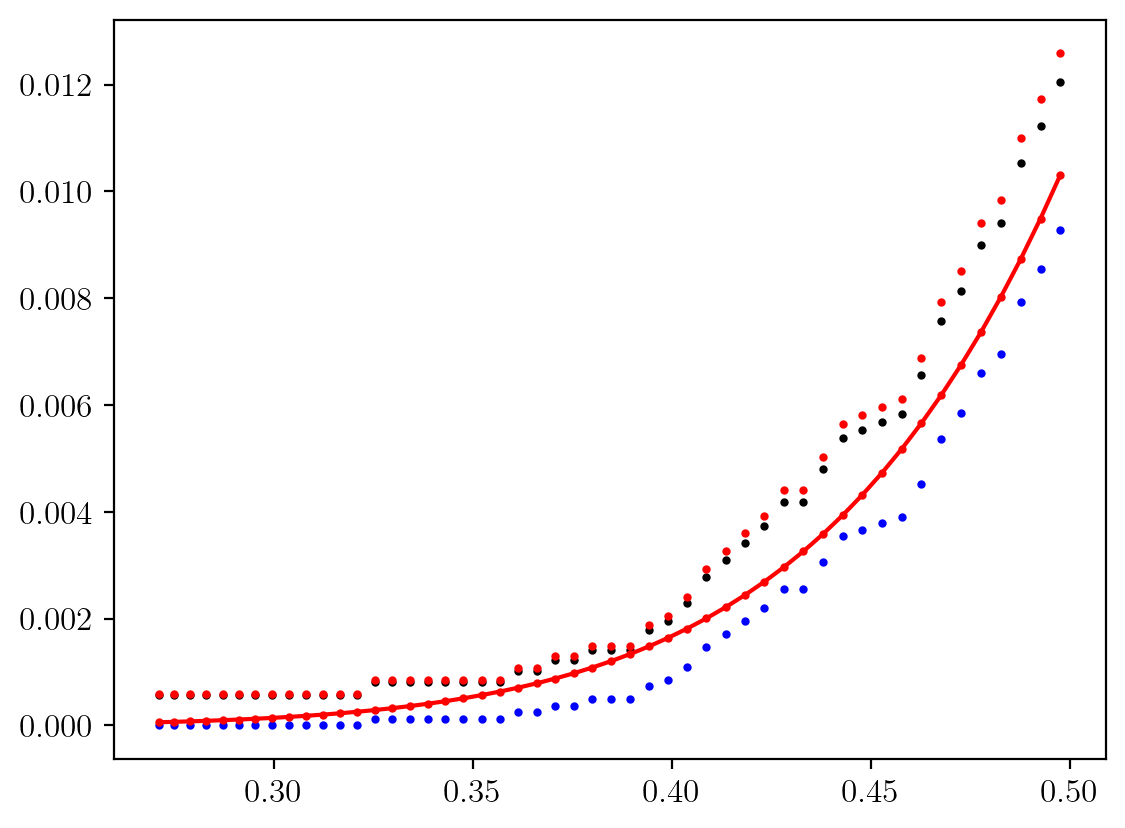

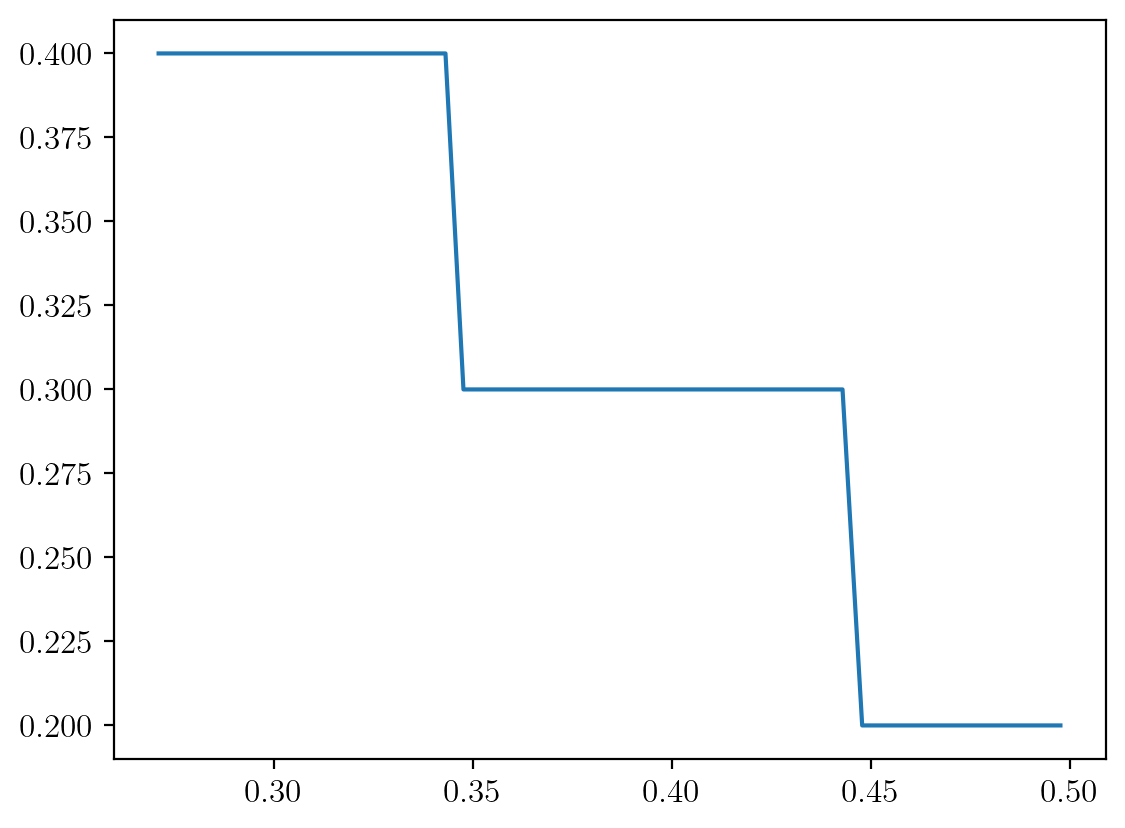

In [3]:
g = ip.cartesian_grid([-1], [1], n=[100], null_hypos=[ip.hypo("x < 0")])
tune_df = ip.tune(Binom1D, g, model_kwargs=dict(n_arm_samples=10))
lam = tune_df["lams"].min()
print(lam)

K = 8192
rej_df = ip.validate(Binom1D, g, lam, K=K, model_kwargs=dict(n_arm_samples=10))
p = scipy.special.expit(g.get_theta()[:, 0])
true_err = scipy.stats.binom.cdf(lam * 10, 10, 1 - p)

plt.plot(p, rej_df["tie_est"], "bo", markersize=2)
plt.plot(p, rej_df["tie_cp_bound"], "ko", markersize=2)
plt.plot(p, rej_df["tie_bound"], "ro", markersize=2)
plt.plot(p, true_err, "r-o", markersize=2)
plt.show()
plt.plot(p, tune_df["lams"])
plt.show()

In [4]:
iter, reports, ada = ip.ada_tune(Binom1D, g, model_kwargs=dict(n_arm_samples=10))

{
    'i': 1,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.001009',
    'lamss': '0.200000',
    'min(B_lamss)': '0.200000',
    'max(B_lamss)': '0.200000',
    'tie_{k}(lamss)': '0.003662',
    'tie + slack': '0.004671',
    'n_impossible': 0,
    'n_refine': 8,
    'n_deepen': 42,
    'n_complete': 0
}

{
    'i': 2,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.000507',
    'lamss': '0.200000',
    'min(B_lamss)': '0.200000',
    'max(B_lamss)': '0.200000',
    'tie_{k}(lamss)': '0.004395',
    'tie + slack': '0.004902',
    'n_impossible': 0
}

## Binomial two class

In [15]:
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[50, 50], null_hypos=[ip.hypo("theta1 < theta0")]
)
# ip.grid.plot_grid(g)
# plt.show()

In [18]:
n = 10
K = 2**12
rej_df = ip.validate(FisherExact, g, 0.0286, K=K, model_kwargs=dict(n_arm_samples=n))

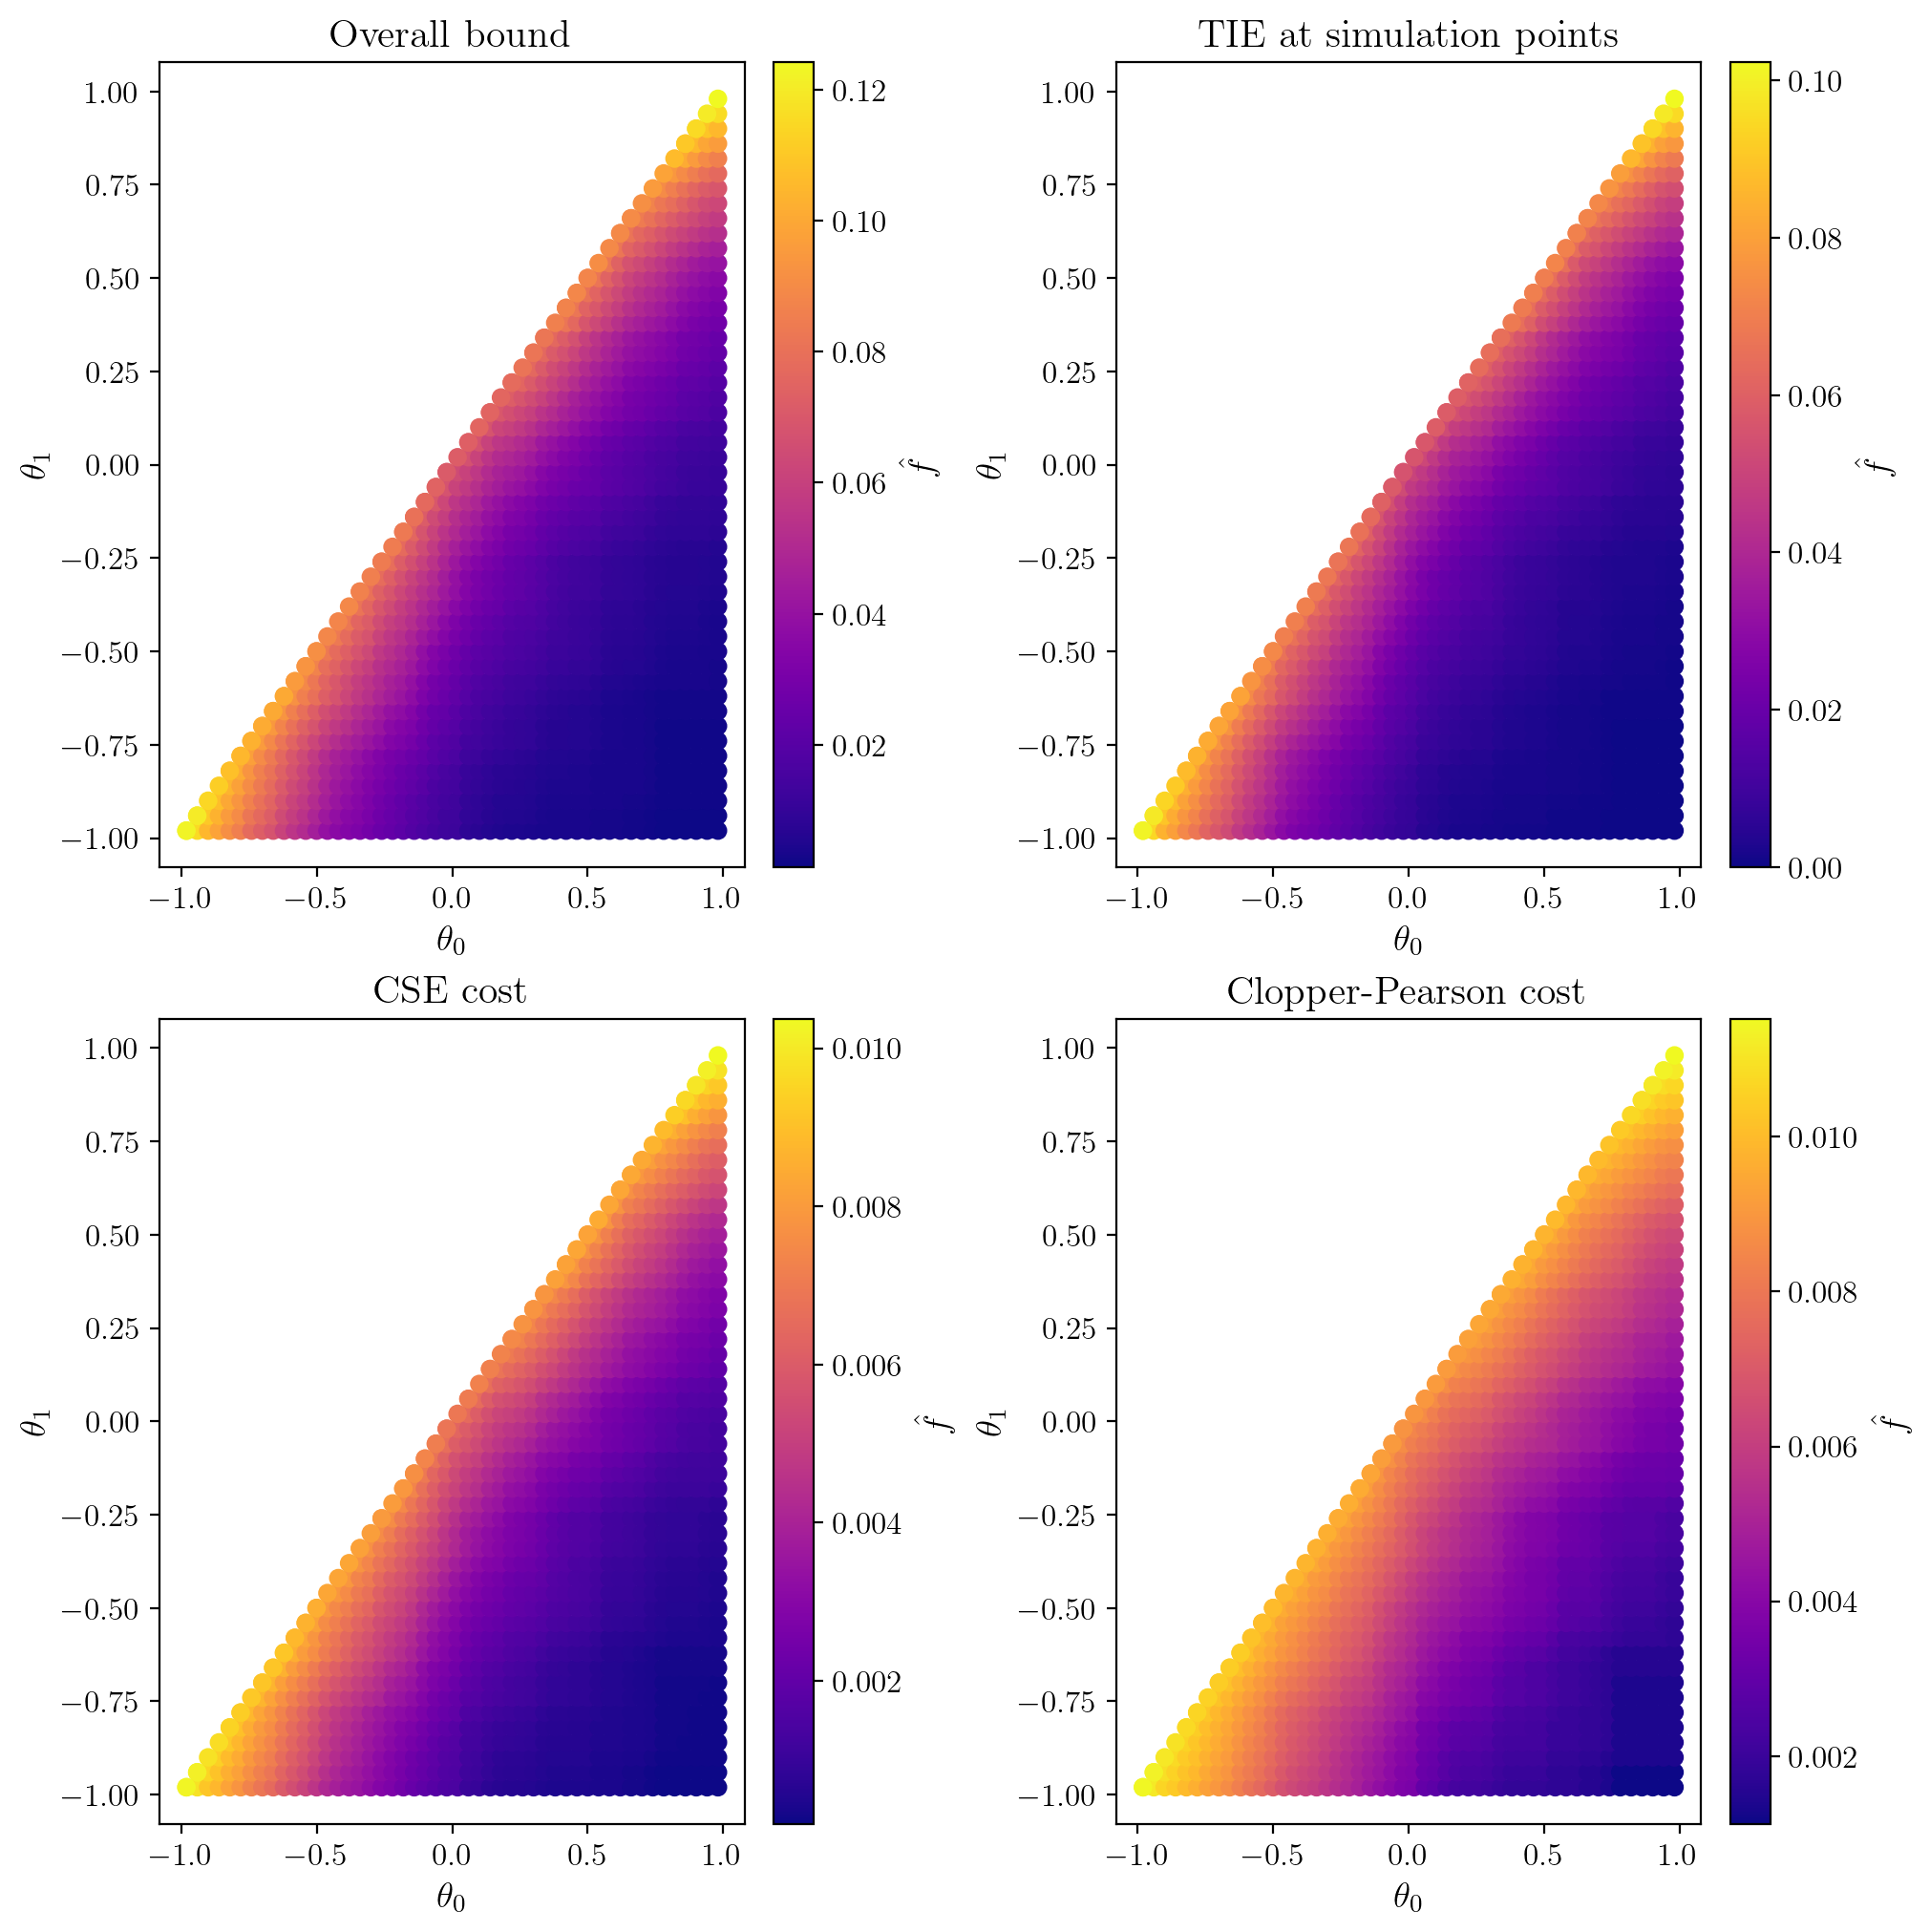

In [25]:
import confirm.imprint.summary

ip.summary.summarize_validate(g, rej_df)

In [7]:
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[4, 4], null_hypos=[ip.hypo("theta1 < theta0")]
)
iter, reports, ada = ip.ada_tune(
    FisherExact, g, alpha=0.1, model_kwargs=dict(n_arm_samples=n)
)

{
    'i': 1,
    'bias_tie': '-0.001633',
    'std_tie': '0.002282',
    'spread_tie': '0.011597',
    'grid_cost': '0.073577',
    'lamss': '0.000357',
    'min(B_lamss)': '0.000000',
    'max(B_lamss)': '0.002739',
    'tie_{k}(lamss)': '0.024048',
    'tie + slack': '0.095992',
    'n_impossible': 0,
    'runtime_convergence_check': '0.565231',
    'runtime_refine_deepen': '0.905588',
    'runtime_processing': '1.797333',
    'n_refine': 5,
    'n_deepen': 5,
    'n_complete': 0
}

{
    'i': 2,
    'bias_tie': '-0.004307',
    'std_tie': '0.005717',
    'spread_tie': '0.011963',
    'grid_cost': '0.046024',
    'lamss': '0.005418',
    'min(B_lamss)': '0.005418',
    'max(B_lamss)': '0.009883',
    'tie_{k}(lamss)': '0.043457',
    'tie + slack': '0.085174',
    'n_impossible': 0,
    'runtime_convergence_check': '0.027645',
    'runtime_refine_deepen': '0.134870',
    'runtime_processing': '3.109608',
    'n_refine': 12,
    'n_deepen': 9,
    'n_complete': 0
}

{
    'i': 3,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.025918',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.016254',
    'tie_{k}(lamss)': '0.059692',
    'tie + slack': '0.085611',
    'n_impossible': 0,
    'runtime_convergence_check': '0.029516',
    'runtime_refine_deepen': '0.138366',
    'runtime_processing': '4.088245',
    'n_refine': 21,
    'n_deepen': 28,
    'n_complete': 0
}

{
    'i': 4,
    'bias_tie': '-0.001035',
    'std_tie': '0.005023',
    'spread_tie': '0.025879',
    'grid_cost': '0.013563',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.016254',
    'tie_{k}(lamss)': '0.061646',
    'tie + slack': '0.074173',
    'n_impossible': 0,
    'runtime_convergence_check': '0.029196',
    'runtime_refine_deepen': '0.132297',
    'runtime_processing': '7.193971',
    'n_refine': 33,
    'n_deepen': 63,
    'n_complete': 0
}

{
    'i': 5,
    'bias_tie': '-0.011133',
    'std_tie': '0.013588',
    'spread_tie': '0.027832',
    'grid_cost': '0.006895',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.065918',
    'tie + slack': '0.061680',
    'n_impossible': 0,
    'runtime_convergence_check': '0.028396',
    'runtime_refine_deepen': '0.131227',
    'runtime_processing': '12.202906',
    'n_refine': 55,
    'n_deepen': 119,
    'n_complete': 0
}

{
    'i': 6,
    'bias_tie': '-0.007617',
    'std_tie': '0.011569',
    'spread_tie': '0.025391',
    'grid_cost': '0.003494',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.071045',
    'tie + slack': '0.066921',
    'n_impossible': 0,
    'runtime_convergence_check': '0.029440',
    'runtime_refine_deepen': '0.140595',
    'runtime_processing': '28.405345',
    'n_refine': 137,
    'n_deepen': 171,
    'n_complete': 0
}

{
    'i': 7,
    'bias_tie': '-0.010400',
    'std_tie': '0.012694',
    'spread_tie': '0.026001',
    'grid_cost': '0.001756',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.072388',
    'tie + slack': '0.063744',
    'n_impossible': 0,
    'runtime_convergence_check': '0.032120',
    'runtime_refine_deepen': '0.145554',
    'runtime_processing': '85.085502',
    'n_refine': 351,
    'n_deepen': 321,
    'n_complete': 0
}

{
    'i': 8,
    'bias_tie': '-0.010449',
    'std_tie': '0.012754',
    'spread_tie': '0.026123',
    'grid_cost': '0.000881',
    'lamss': '0.016254',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.072998',
    'tie + slack': '0.063429',
    'n_impossible': 0,
    'runtime_convergence_check': '0.031962',
    'runtime_refine_deepen': '0.132038',
    'runtime_processing': '33.200377',
    'n_refine': 7,
    'n_deepen': 1017,
    'n_complete': 0
}

{
    'i': 9,
    'bias_tie': '0.000986',
    'std_tie': '0.004786',
    'spread_tie': '0.024658',
    'grid_cost': '0.000894',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.085815',
    'tie + slack': '0.087696',
    'n_impossible': 0,
    'runtime_convergence_check': '0.031830',
    'runtime_refine_deepen': '0.132343',
    'runtime_processing': '59.407903',
    'n_refine': 16,
    'n_deepen': 1008,
    'n_complete': 0
}

{
    'i': 10,
    'bias_tie': '0.000005',
    'std_tie': '0.000012',
    'spread_tie': '0.000031',
    'grid_cost': '0.001832',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.071503',
    'tie + slack': '0.073340',
    'n_impossible': 0,
    'runtime_convergence_check': '0.552255',
    'runtime_refine_deepen': '0.136159',
    'runtime_processing': '183.829483',
    'n_refine': 971,
    'n_deepen': 53,
    'n_complete': 0
}

{
    'i': 11,
    'bias_tie': '0.002374',
    'std_tie': '0.007060',
    'spread_tie': '0.023743',
    'grid_cost': '0.000901',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.084167',
    'tie + slack': '0.087442',
    'n_impossible': 0,
    'runtime_convergence_check': '0.533393',
    'runtime_refine_deepen': '0.137595',
    'runtime_processing': '83.123575',
    'n_refine': 43,
    'n_deepen': 981,
    'n_complete': 0
}

{
    'i': 12,
    'bias_tie': '0.000980',
    'std_tie': '0.004757',
    'spread_tie': '0.024506',
    'grid_cost': '0.000443',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.088837',
    'tie + slack': '0.090260',
    'n_impossible': 0,
    'runtime_convergence_check': '0.086590',
    'runtime_refine_deepen': '0.142008',
    'runtime_processing': '60.625537',
    'n_refine': 0,
    'n_deepen': 1024,
    'n_complete': 0
}

{
    'i': 13,
    'bias_tie': '0.000952',
    'std_tie': '0.004620',
    'spread_tie': '0.023804',
    'grid_cost': '0.000450',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.084412',
    'tie + slack': '0.085814',
    'n_impossible': 0,
    'runtime_convergence_check': '0.080691',
    'runtime_refine_deepen': '0.130574',
    'runtime_processing': '121.287510',
    'n_refine': 81,
    'n_deepen': 943,
    'n_complete': 0
}

{
    'i': 14,
    'bias_tie': '0.000784',
    'std_tie': '0.003803',
    'spread_tie': '0.019592',
    'grid_cost': '0.000914',
    'lamss': '0.028638',
    'min(B_lamss)': '0.016254',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.075287',
    'tie + slack': '0.076984',
    'n_impossible': 0,
    'runtime_convergence_check': '0.681635',
    'runtime_refine_deepen': '0.127559',
    'runtime_processing': '514.030757',
    'n_refine': 304,
    'n_deepen': 720,
    'n_complete': 0
}

{
    'i': 15,
    'bias_tie': '0.000000',
    'std_tie': '0.000000',
    'spread_tie': '0.000000',
    'grid_cost': '0.000442',
    'lamss': '0.028638',
    'min(B_lamss)': '0.028638',
    'max(B_lamss)': '0.028638',
    'tie_{k}(lamss)': '0.093323',
    'tie + slack': '0.093765',
    'n_impossible': 0,
    'runtime_convergence_check': '0.105389'
}

In [8]:
all_df = ada.tiledb.get_all()
all_df.to_parquet("fisher_save.parquet")

In [ ]:
ga = ip.Grid(all_df).active()
active_df = ga.df
lamss = active_df["lams"].min()
rej_df = ip.validate(FisherExact, ga, lamss, K=K, model_kwargs=dict(n_arm_samples=n))

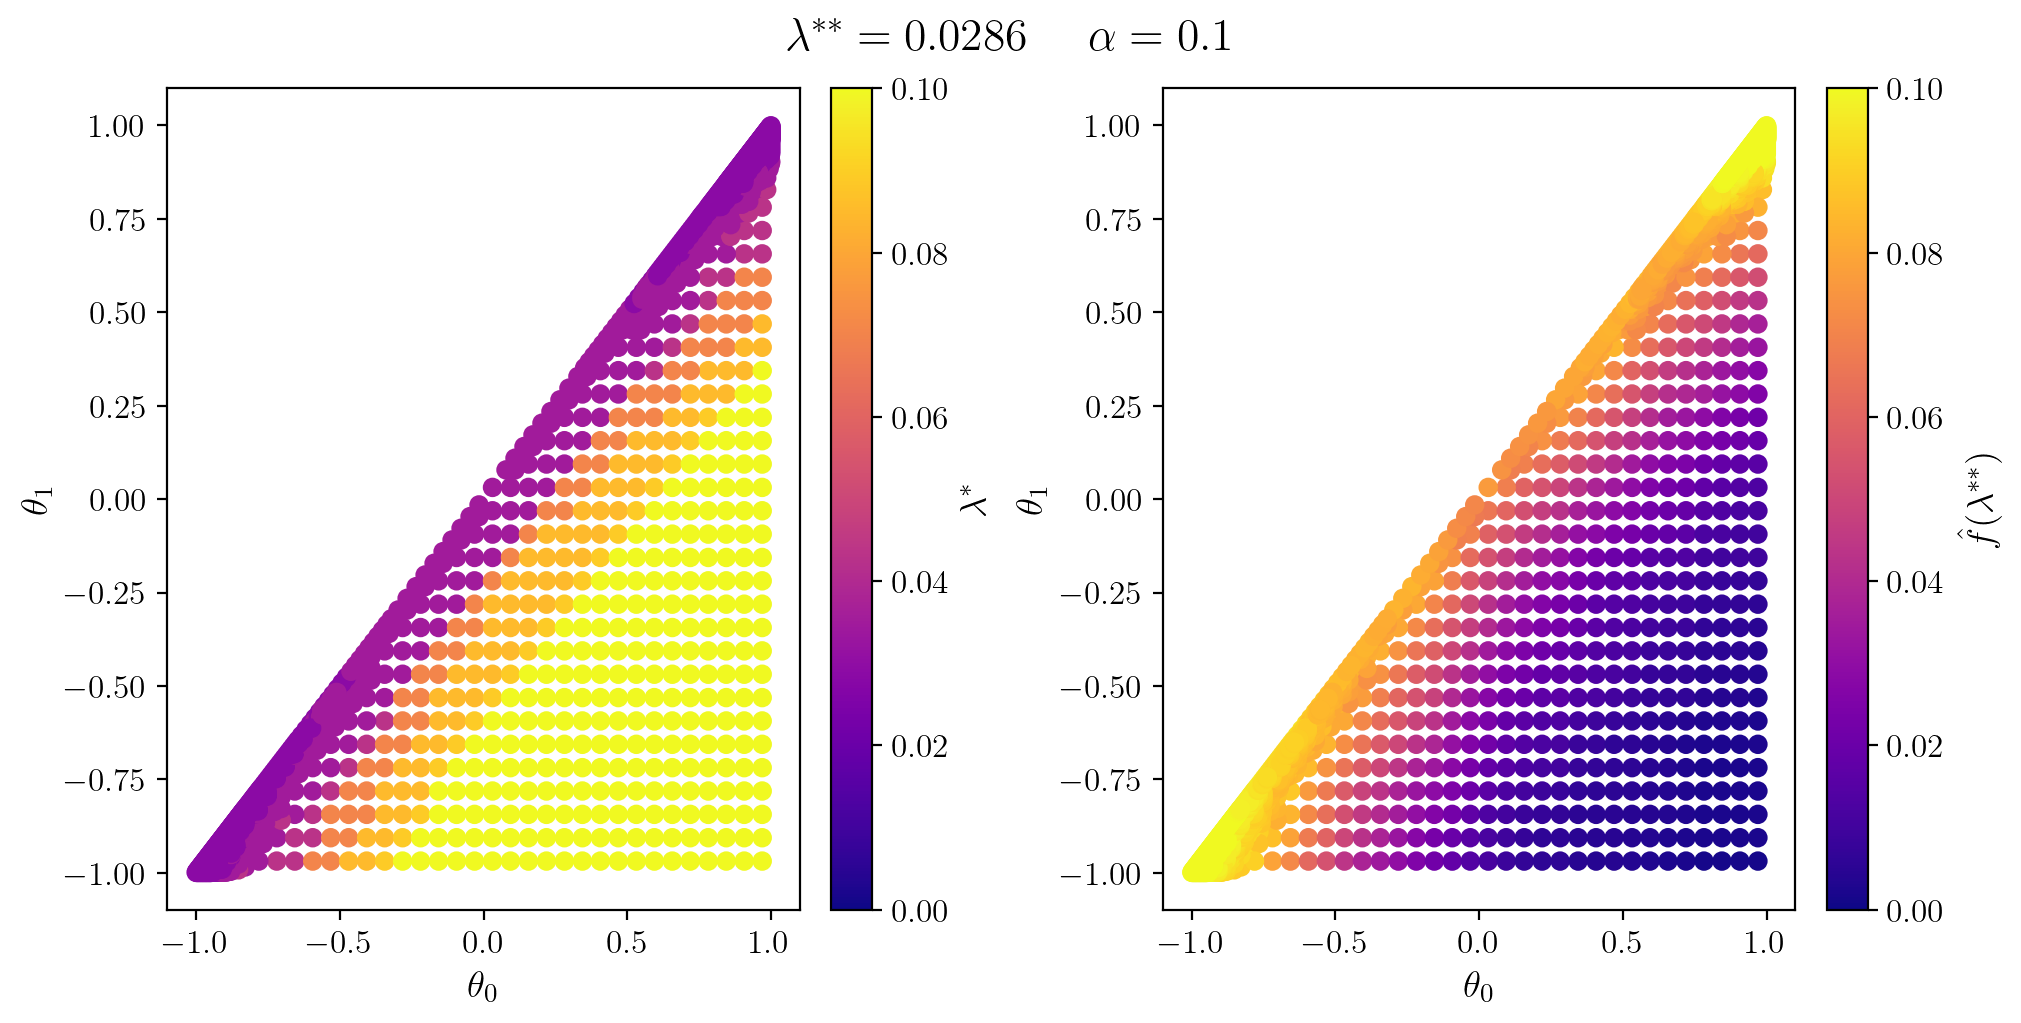

In [52]:
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.suptitle("$\lambda^{**} = " + f"{lamss:.4f} ~~~~ \\alpha = 0.1$")
plt.scatter(
    active_df["theta0"], active_df["theta1"], c=active_df["lams"], vmin=0, vmax=0.1
)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\lambda^*$")

plt.subplot(1, 2, 2)
plt.scatter(
    active_df["theta0"], active_df["theta1"], c=rej_df["tie_bound"], vmin=0, vmax=0.1
)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\hat{f}(\lambda^{**})$")
plt.show()

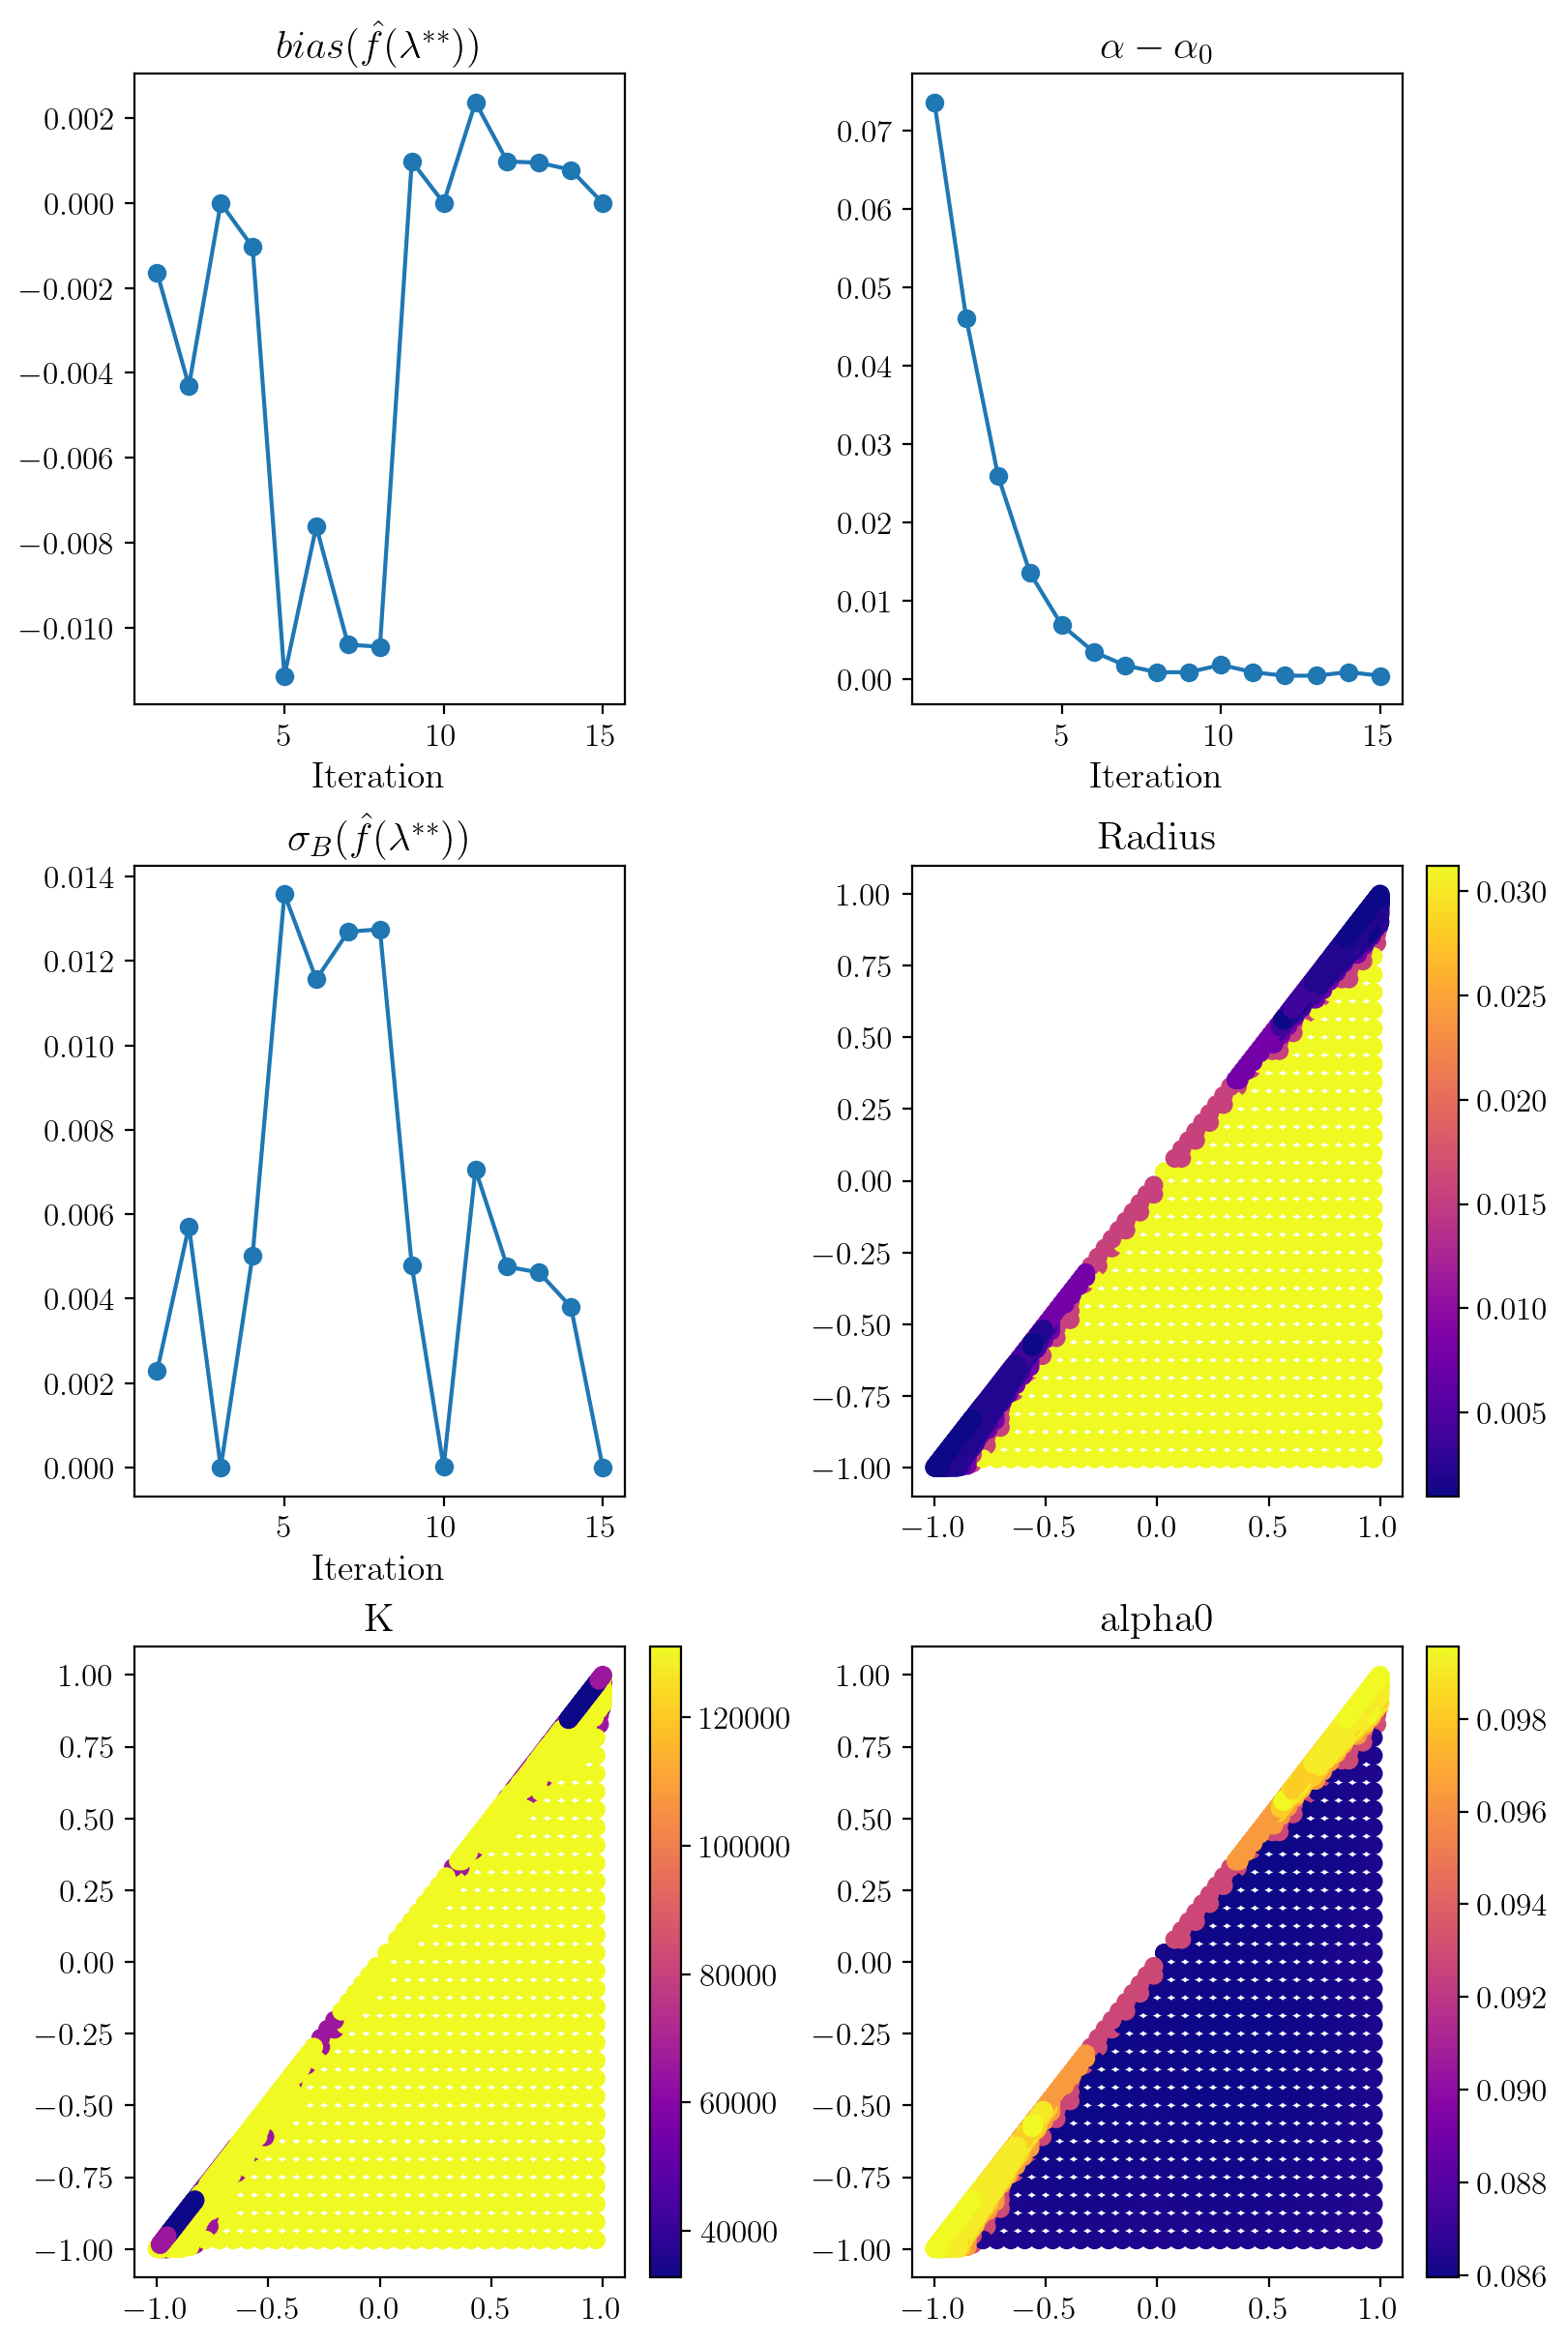

In [60]:
import pandas as pd

evolution = pd.DataFrame(reports)
# Figure plotting bias, grid_cost and std_tie
fig, ax = plt.subplots(3, 2, figsize=(8, 12), constrained_layout=True)
ax[0][0].plot(evolution["i"], evolution["bias_tie"], "o-")
ax[0][0].set_xlabel("Iteration")
ax[0][0].set_title(r"$bias(\hat{f}(\lambda^{**}))$")
ax[0][1].plot(evolution["i"], evolution["grid_cost"], "o-")
ax[0][1].set_xlabel("Iteration")
ax[0][1].set_title(r"$\alpha - \alpha_0$")
ax[1][0].plot(evolution["i"], evolution["std_tie"], "o-")
ax[1][0].set_xlabel("Iteration")
ax[1][0].set_title(r"$\sigma_{B}(\hat{f}(\lambda^{**}))$")
sc11 = ax[1][1].scatter(active_df["theta0"], active_df["theta1"], c=active_df["radii0"])
plt.colorbar(sc11)
ax[1][1].set_title("Radius")
sc20 = ax[2][0].scatter(active_df["theta0"], active_df["theta1"], c=active_df["K"])
plt.colorbar(sc20)
ax[2][0].set_title("K")
sc21 = ax[2][1].scatter(active_df["theta0"], active_df["theta1"], c=active_df["alpha0"])
plt.colorbar(sc21)
ax[2][1].set_title("alpha0")
plt.show()